In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Van der Pauw measurement

In [18]:
vdP_data = pd.read_csv(f"data/Caro_Carlo_vdPauw.txt", delimiter = "\t", skiprows = 4, skipinitialspace = True)
vdP_data

,# I_res(A),I_hall(A),B(mT),temp(K),Vr1234(V),Vr2134(V),Vr2341(V),Vr3241(V),Vr3412(V),Vr4312(V),Vr4123(V),Vr1423(V),Vh1342+(V),Vh3142+(V),Vh2413+(V),Vh4213+(V),Vh1342-(V),Vh3142-(V),Vh2413-(V),Vh4213-(V)
0,0.002,0.002,200,293.9,-0.32206,0.333062,-0.244881,0.237033,-0.330457,0.313789,-0.227492,0.247476,0.088215,-0.100658,-0.073427,0.081455,0.068840,-0.081760,-0.093200,0.099623
1,0.002,0.002,400,293.9,-0.32206,0.333062,-0.244881,0.237033,-0.330457,0.313789,-0.227492,0.247476,0.098297,-0.110628,-0.063018,0.071872,0.058322,-0.071103,-0.104175,0.109538
2,0.002,0.002,600,293.9,-0.32206,0.333062,-0.244881,0.237033,-0.330457,0.313789,-0.227492,0.247476,0.108439,-0.120678,-0.052603,0.062328,0.048213,-0.060891,-0.114615,0.119487


In [22]:
vdP_data.keys(), vdP_data["Vr1234(V) "][0]

(Index(['# I_res(A)', 'I_hall(A)', 'B(mT)', 'temp(K)', 'Vr1234(V) ',
        'Vr2134(V) ', 'Vr2341(V) ', 'Vr3241(V) ', 'Vr3412(V) ', 'Vr4312(V) ',
        'Vr4123(V) ', 'Vr1423(V) ', 'Vh1342+(V) ', 'Vh3142+(V) ', 'Vh2413+(V) ',
        'Vh4213+(V) ', 'Vh1342-(V) ', 'Vh3142-(V) ', 'Vh2413-(V) ',
        'Vh4213-(V) '],
       dtype='object'),
 -0.32206)

In [ ]:
# 1.a van der Pauw measurements

# Hall resistivities
I_res = vdP_data["# I_res(A)"][0]
d = 1                                       # sample width ???? (should be irrelevant)

R_1234 = vdP_data["Vr1234(V) "][0] / I_res
R_2134 = vdP_data["Vr2134(V) "][0] / I_res
R_2341 = vdP_data["Vr2341(V) "][0] / I_res
R_3241 = vdP_data["Vr3241(V) "][0] / I_res
R_3412 = vdP_data["Vr3412(V) "][0] / I_res
R_4312 = vdP_data["Vr4312(V) "][0] / I_res
R_4123 = vdP_data["Vr4123(V) "][0] / I_res
R_1423 = vdP_data["Vr1423(V) "][0] / I_res

Q_A = (R_2134-R_1234) / (R_3241-R_2341)
Q_B = (R_4312-R_3412) / (R_1423-R_4123)

A_A = ( (Q_A-1) / (Q_A+1) )**2
A_B = ( (Q_B-1) / (Q_B+1) )**2

f_A = 1 - 0.34657*A_A - 0.09236*A_A**2
f_B = 1 - 0.34657*A_B - 0.09236*A_B**2

# inverse conductivity
rho = np.pi*d / 8 / np.log(2) * ( (R_2134-R_1234+R_3241-R_2341)*f_A + (R_4312-R_3412+R_1423-R_4123)*f_B )


# Hall factors
I_hall = vdP_data["I_hall(A)"][0]
B_200 = vdP_data["B(mT)"][0] / 1000
B_400 = vdP_data["B(mT)"][1] / 1000
B_600 = vdP_data["B(mT)"][2] / 1000

R_H_200 = 1 / 8 * d / B_200 * ( (vdP_data["Vh3142+(V) "][0]-vdP_data["Vh1342+(V) "][0]+vdP_data["Vh1342-(V) "][0]-vdP_data["Vh3142-(V) "][0]) + (vdP_data["Vh4213+(V) "][0]-vdP_data["Vh2413+(V) "][0]+vdP_data["Vh2413-(V) "][0]-vdP_data["Vh4213-(V) "][0]) ) / I_hall
R_H_400 = 1 / 8 * d / B_200 * ( (vdP_data["Vh3142+(V) "][1]-vdP_data["Vh1342+(V) "][1]+vdP_data["Vh1342-(V) "][1]-vdP_data["Vh3142-(V) "][1]) + (vdP_data["Vh4213+(V) "][1]-vdP_data["Vh2413+(V) "][1]+vdP_data["Vh2413-(V) "][1]-vdP_data["Vh4213-(V) "][1]) ) / I_hall
R_H_600 = 1 / 8 * d / B_200 * ( (vdP_data["Vh3142+(V) "][2]-vdP_data["Vh1342+(V) "][2]+vdP_data["Vh1342-(V) "][2]-vdP_data["Vh3142-(V) "][2]) + (vdP_data["Vh4213+(V) "][2]-vdP_data["Vh2413+(V) "][2]+vdP_data["Vh2413-(V) "][2]-vdP_data["Vh4213-(V) "][2]) ) / I_hall

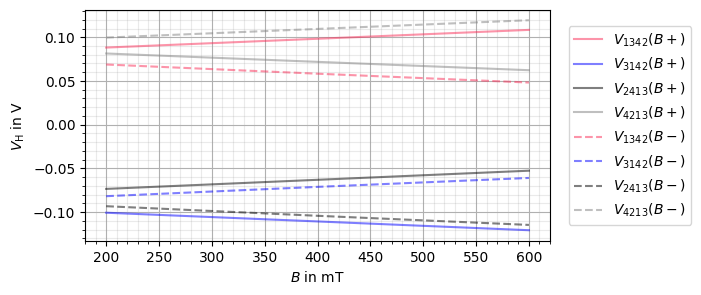

In [ ]:
# 1.b - B-field dependence of Hall voltages

# R_1_plus = 1 / 2 * ()


# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'$B$ in mT')      # \mathrm{\AA} wird im notebook angezeigt aber nicht im pgf plot!! dazu durch \si{\AA} in der .pgf ersetzen!!
ax.set_ylabel(r'$V_\mathrm{H}$ in V')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(vdP_data["B(mT)"], vdP_data["Vh1342+(V) "], color = "xkcd:red pink", alpha = 0.5, label = r"$V_\mathrm{1342}(B+)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh3142+(V) "], color = "blue", alpha = 0.5, label = r"$V_\mathrm{3142}(B+)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh2413+(V) "], color = "black", alpha = 0.5, label = r"$V_\mathrm{2413}(B+)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh4213+(V) "], color = "grey", alpha = 0.5, label = r"$V_\mathrm{4213}(B+)$")

ax.plot(vdP_data["B(mT)"], vdP_data["Vh1342-(V) "], color = "xkcd:red pink", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{1342}(B-)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh3142-(V) "], color = "blue", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{3142}(B-)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh2413-(V) "], color = "black", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{2413}(B-)$")
ax.plot(vdP_data["B(mT)"], vdP_data["Vh4213-(V) "], color = "grey", alpha = 0.5, linestyle = "dashed", label = r"$V_\mathrm{4213}(B-)$")

ax.legend()
# ax.legend(loc="center left")
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


plt.savefig('FM.QHE_visualizations/V_H_over_B.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('FM.QHE_visualizations/V_H_over_B.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

## 2. Classical Hall-Effect

In [ ]:
vdP_data = pd.read_csv(f"data/Caro_Carlo_vdPauw.txt", delimiter = "\t", skiprows = 4, skipinitialspace = True)